In [1]:
# Notebook: Analysis of association between expression and methylation
# Description: Notebook contains analysis genes expresion and methylation for covid-19 and non-covid-19 patients
# Data collected from: GSE157103 [expression data] and  GSE174818 [methylation] 

In [2]:
%load_ext lab_black

In [3]:
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as sts
import seaborn as sns

from IPython.display import display

In [5]:
# Load mynorm

In [4]:
usa_myNorm = pd.read_csv(
    "../data/processed/CorrectedMyNorms/mynorm_USA.csv", index_col=0
)

usa_myNorm

,GSM5331993,GSM5331994,GSM5331995,GSM5331996,GSM5331997,GSM5331998,GSM5331999,GSM5332000,GSM5332001,GSM5332002,...,HB_Control_73,HB_Control_74,HB_Control_75,HB_Control_76,HB_Control_77,HB_Control_78,HB_Control_79,HB_Control_80,HB_Control_81,HB_Control_82
cg07881041,0.907112,0.971388,0.942006,0.948533,0.957636,0.945772,0.943829,0.952104,0.932743,0.955412,...,0.952436,0.938693,0.943977,0.971725,0.938654,0.960484,0.954697,0.965845,0.951506,0.947336
cg03513874,0.930803,0.968131,0.973535,0.967526,0.961285,0.978562,0.966073,0.962518,0.955092,0.972766,...,0.968578,0.959841,0.955021,0.975868,0.967214,0.967345,0.960678,0.989731,0.967900,0.983526
cg05451842,0.026348,0.013003,0.019991,0.016949,0.018075,0.023623,0.025464,0.020195,0.043667,0.033632,...,0.029159,0.027931,0.031016,0.023677,0.015521,0.011736,0.010232,0.007967,0.027181,0.020793
cg14797042,0.969481,0.978806,0.986003,0.977517,0.978224,0.965188,0.978659,0.982349,0.965861,0.987963,...,0.985299,0.985661,0.971260,0.991053,0.983943,0.988877,0.989179,0.991238,0.990454,0.981831
cg09838562,0.017161,0.020529,0.014868,0.016745,0.025921,0.012837,0.034109,0.010535,0.009966,0.008117,...,0.016203,0.012932,0.012165,0.023244,0.018877,0.002886,0.019931,0.021499,0.011036,0.002002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg19812938,0.892083,0.895865,0.896455,0.892748,0.897641,0.911392,0.906955,0.904228,0.856117,0.915622,...,0.891883,0.890429,0.886702,0.910530,0.902790,0.887237,0.919820,0.912155,0.897211,0.918342
cg06272054,0.009366,0.008634,0.007337,0.005091,0.006229,0.003209,0.023044,0.012690,0.019844,0.018107,...,0.015976,0.009764,0.011808,0.004917,0.002307,0.007479,0.005711,0.007027,0.008502,0.012493
cg07255356,0.017732,0.009440,0.010810,0.016370,0.021392,0.017397,0.024616,0.024749,0.026534,0.025573,...,0.034452,0.015616,0.028496,0.014111,0.005211,0.013997,0.008494,0.010401,0.016325,0.013383
cg24220897,0.914550,0.972761,0.914840,0.938005,0.945440,0.952442,0.964252,0.957984,0.922900,0.954592,...,0.850247,0.855552,0.943040,0.959635,0.955457,0.975233,0.955193,0.954238,0.930505,0.940708


In [6]:
# Load differetntial methylated genes

In [7]:
dmg = pd.read_csv(
    "../Files/DMGenesCoVvsNoNCoVCorrected.csv", index_col=0
).UCSC_RefGene_Name.to_frame()

# Add PARP9 (the same probes as DTX3L)
parp9_probes = dmg[dmg["UCSC_RefGene_Name"] == "DTX3L"]
parp9_probes["UCSC_RefGene_Name"] = "PARP9"
dmg = pd.concat((dmg, parp9_probes))

genes_set = dmg.UCSC_RefGene_Name.str.split(";").explode().unique()
len(genes_set)

<ipython-input-7-5fdaa25a22da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parp9_probes["UCSC_RefGene_Name"] = "PARP9"


20

In [9]:
# Load expression data

In [41]:
ttable = pd.read_table("../Expression/GSE157103_genes.tpm.tsv", index_col=0).T

ttable = ttable.loc[
    :, ttable.mean().round(0) > 1
]  # Drop genes with average expression value < 1

ttable["TYPE"] = [
    "COVID-19 USA" if name.startswith("C") else "non-COVID-19 USA"
    for name in ttable.index
]  # Add TYPE column with disease status

In [42]:
# Find overlapp between expression and methylation data

In [43]:
genes_set = set(genes_set).intersection(set(ttable.columns))
len(genes_set)

13

In [44]:
# Convert sample names in mynorm

In [45]:
sample_names = dict(
    pd.read_csv("../data/raw/CONCATED_USA_HB/SampleSheet.csv", index_col=0)["ID"]
)

In [46]:
usa_myNorm.columns = [
    sample_names.get(name) if name in sample_names.keys() else name
    for name in usa_myNorm.columns
]  # Convert GSE to IDs

usa_myNorm = usa_myNorm[
    [name for name in usa_myNorm.columns if not name.startswith("GSE")]
]

usa_myNorm.shape

(732965, 128)

In [47]:
DEG = set(pd.read_csv("../Files/CoVvsNoNCoVDEGs.csv", index_col=0).values.flatten())
DEG

{'AIM2',
 'DDX60',
 'DTX3L',
 'IFI44L',
 'MX1',
 'PARP9',
 'RSAD2',
 'TRIM22',
 'TTC33'}

In [48]:
dmg

,UCSC_RefGene_Name
CpG,
cg15528722,TTC33
cg24678928,DDX60
cg03607951,IFI44L
cg07815522,DTX3L
cg24103563,TRIM34
cg13304609,IFI44L
cg15452182,LOC101928650
cg17515347,AIM2
cg07863524,OR3A4


In [49]:
# Plot methylation vs expression

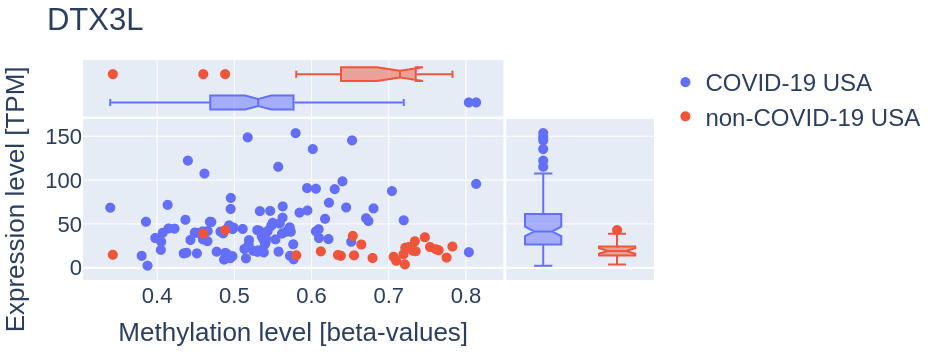

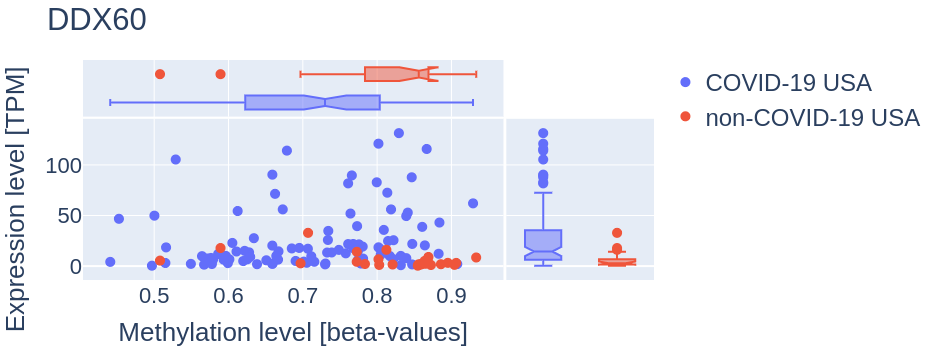

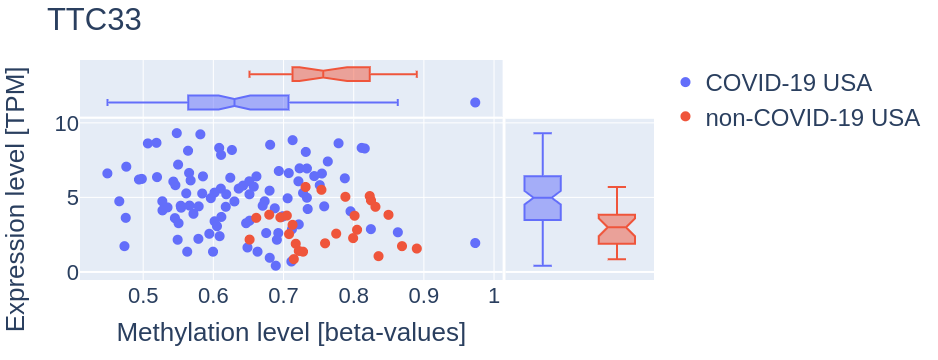

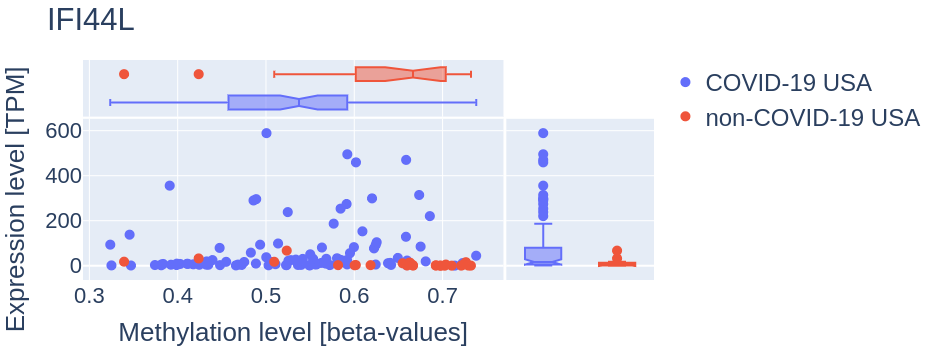

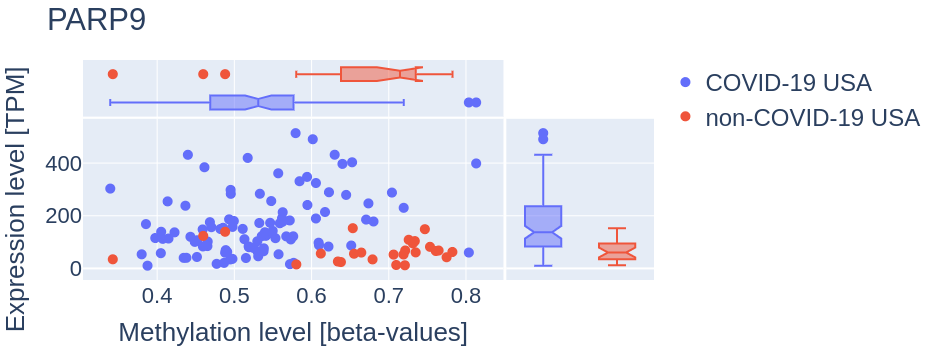

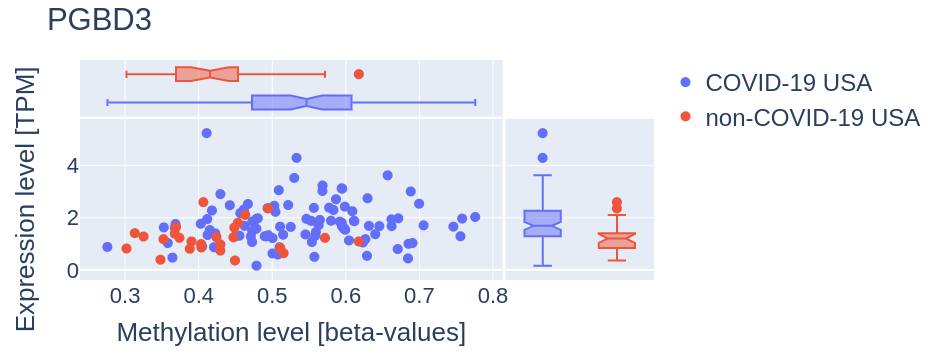

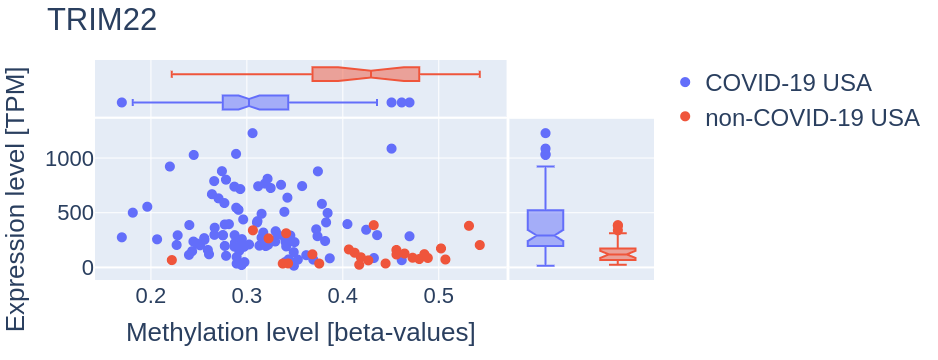

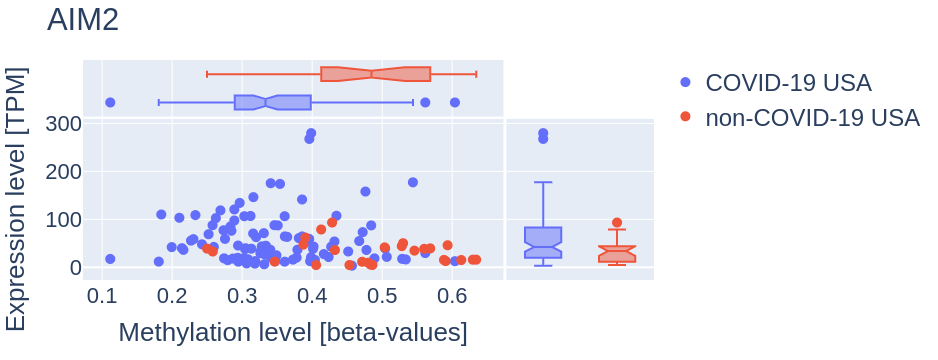

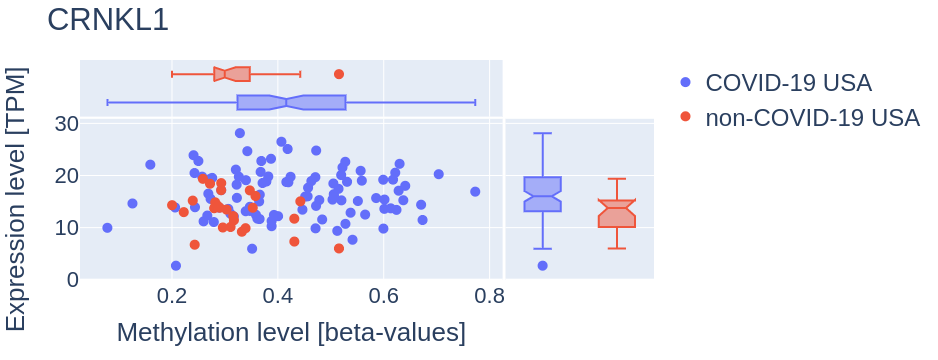

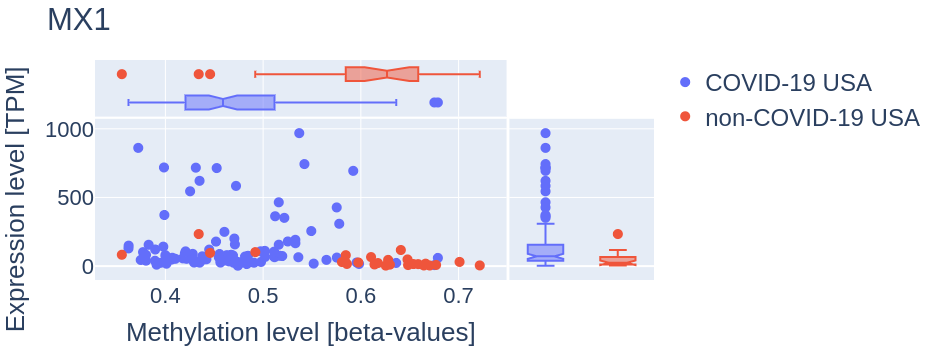

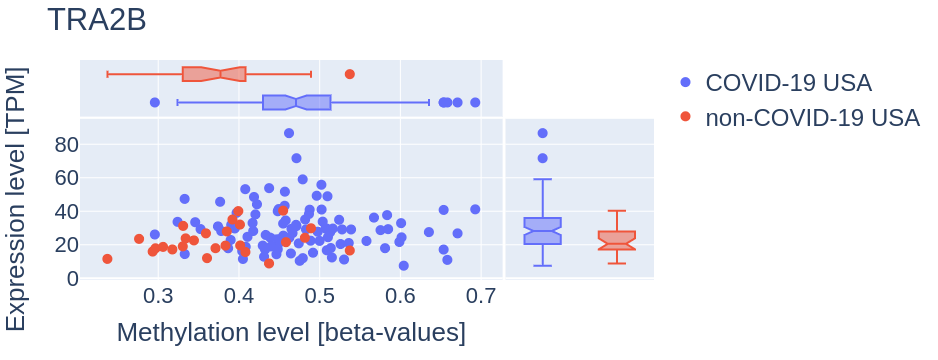

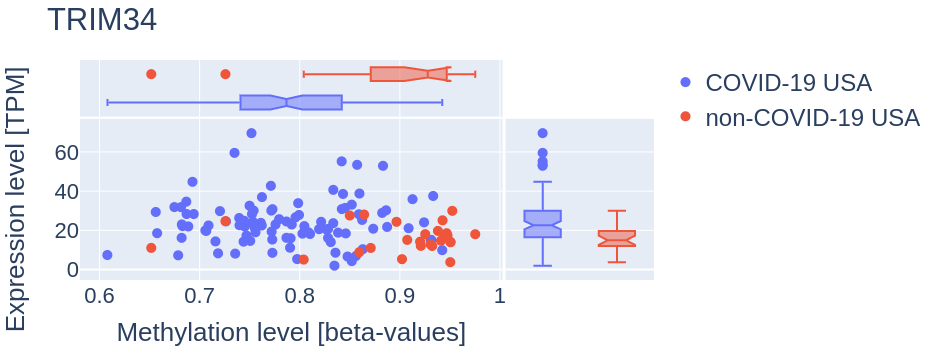

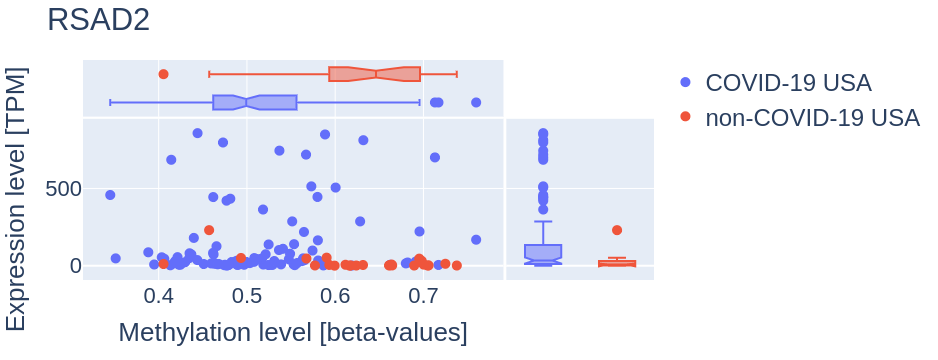

In [50]:
mynorm_probes = set(usa_myNorm.index)  # all probes in mynorm

for gene in genes_set:

    probe_in_gene = dmg[
        dmg["UCSC_RefGene_Name"].str.contains(gene)
    ].index.tolist()  # Get DMPs identfied in specifi DEG

    # If number of probes > 1 use mean methylation level
    if len(probe_in_gene) > 1:
        cpgs_met_level = usa_myNorm.loc[probe_in_gene, :].mean().T
        cpgs_met_level.name = f"Average of {' '.join(probe_in_gene)}"
        probe_in_gene = cpgs_met_level.name

    else:
        cpgs_met_level = usa_myNorm.loc[probe_in_gene].T

    # Gete gene expression level
    gene_exp_level_ = ttable[[gene, "TYPE"]]

    # Merge data about: methylation, expresion and disease status
    df = pd.concat((gene_exp_level_, cpgs_met_level), axis=1).dropna()

    # Create figure
    fig = px.scatter(
        df,
        x=probe_in_gene,
        y=gene,
        color="TYPE",
        marginal_y="box",
        marginal_x="box",
    )

    if gene in DEG:
        deg = True
    else:
        deg = False

    fig.update_layout(
        yaxis_title=f"Expression level [TPM]",
        xaxis_title=f"Methylation level [beta-values]",
        legend_title="",
        title=f"{gene}",
        legend=dict(font=dict(size=24), title=""),
        font=dict(size=22),
    )

    fig.update_traces(marker=dict(size=10))
    fig.write_image(f"../Plots/ExpressionMethylPlots/{gene}.jpg")
    fig.show()